In [69]:
from func_modules import ControllerGraph, root, faitabella, colorgraph, identifygroup
import networkx as nx
import pickle

# Functionality 5: explaining and visualizing

For this functionality is required to find the communities that make the first graph, hero_graph.
In a network could be found nodes that can be easily grouped into (potentially overlapping) sets such that each set of nodes is densely connected internally: this type of group is called *community* . There are a lot of algorithms to find the communities, in our case we'll use the Girvan Newman algorithm: this algorithjm detects communities by progressively removing edges with the higher edge betweenness centrality from the network.

In [70]:
edges = pd.read_csv('edges.csv')
controller = ControllerGraph(edges)
with open('graphs.pickle', 'rb') as file:
    hero_graph, hero_comics_graph = pickle.load(file)

In [71]:
numedges, graph1, checkhero, graph= controller.functionality(5, hero_graph, num_heroes = 50, 
                                                  hero_1 = 'CAPTAIN AMERICA', hero_2 = 'IRON MAN/TONY STARK')

comps = list(nx.connected_components(graph1)) # lists of different connected component

In [72]:
print('This is the number of removed edges: ', numedges)

This is the number of removed edges:  1003


As we can see in the table the second community is composed only by one node: it's due to the extremely high density of the graph

In [73]:
faitabella(graph1,comps)       # communities' table 

Group 0                  Group 1
-----------------------  -------------------
STORM/ORORO MUNROE S     IRON MAN/TONY STARK
WOLVERINE/LOGAN
CAPTAIN AMERICA
SUB-MARINER/NAMOR MA
ANT-MAN/DR. HENRY J.
PUNISHER II/FRANK CA
SHADOWCAT/KATHERINE
CYCLOPS/SCOTT SUMMER
WONDER MAN/SIMON WIL
JONES, RICHARD MILHO
JARVIS, EDWIN
HULK/DR. ROBERT BRUC
DAREDEVIL/MATT MURDO
HERCULES [GREEK GOD]
SPIDER-MAN/PETER PARKER
ANGEL/WARREN KENNETH
QUICKSILVER/PIETRO M
SCARLET WITCH/WANDA
CANNONBALL II/SAM GU
MR. FANTASTIC/REED R
RICHARDS, FRANKLIN B
THOR/DR. DONALD BLAK
FURY, COL. NICHOLAS
DR. DOOM/VICTOR VON
PROFESSOR X/CHARLES
ICEMAN/ROBERT BOBBY
ODIN [ASGARDIAN]
BLACK PANTHER/T'CHAL
INVISIBLE WOMAN/SUE
COLOSSUS II/PETER RA
BEAST/HENRY &HANK& P
CAPTAIN BRITAIN/BRIA
NIGHTCRAWLER/KURT WA
HAWK
BLACK WIDOW/NATASHA
ROBERTSON, JOE
HUMAN TORCH/JOHNNY S
JAMESON, J. JONAH
MARVEL GIRL/JEAN GRE
PARKER, MAY
THING/BENJAMIN J. GR
WATSON-PARKER, MARY
DR. STRANGE/STEPHEN
WASP/JANET VAN DYNE
SHE-HULK/JENNIFER WA
VISION
SILVER SU

Indeed the nodes are very connected.


This is the original graph


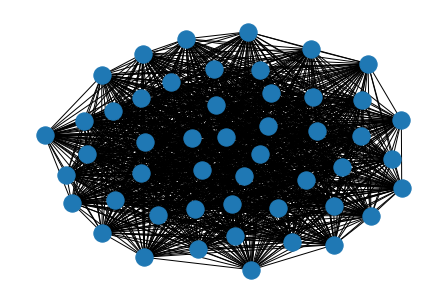

In [74]:
print('\nThis is the original graph')
nx.draw(graph, with_labels=False)          # plot original graph
plt.show()

Two communities: one extremely dense and the other with only one node


These are the communities  2


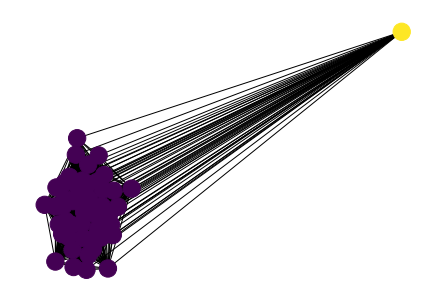

In [75]:
color_map, pos = colorgraph(graph1, comps)  # function which defines nodes' color and position by belonging community
print('\nThese are the communities ', len(comps))
nx.draw(graph, pos, node_color = list(color_map.values()), with_labels = False)
plt.show()

As we can see 'CAPTAIN AMERICA' and 'IRON MAN/TONY STARK' are in two different communities

Plot the final graph and identify the community/communities of 'CAPTAIN AMERICA' and 'IRON MAN/TONY STARK'


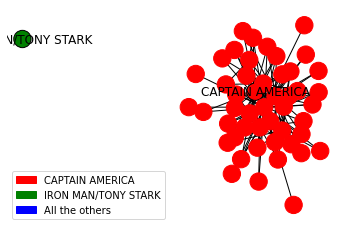

In [76]:
print("Plot the final graph and identify the community/communities of 'CAPTAIN AMERICA' and 'IRON MAN/TONY STARK'")
idhero = identifygroup(graph1,'CAPTAIN AMERICA','IRON MAN/TONY STARK',color_map)  # given heros' communitiesw 